In [13]:
!pip install pandas numpy seaborn matplotlib plotly wordcloud nltk scikit-learn



In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('text_dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
print(df.shape)

(72134, 4)


## Exploratory Data Analysis

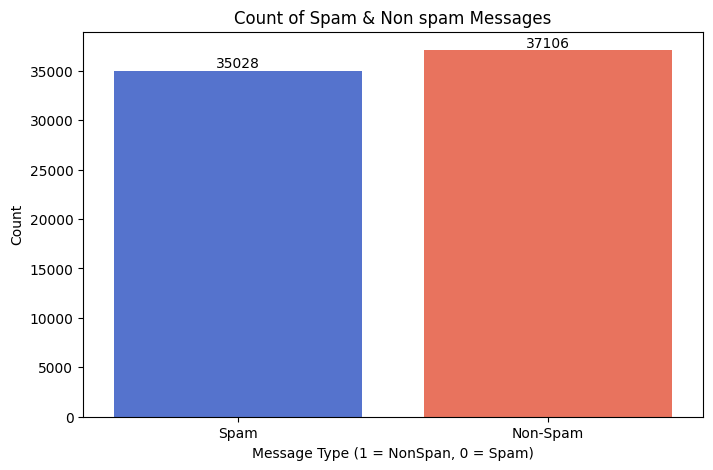

In [11]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['label'], palette=['royalblue', 'tomato'])
plt.xlabel("Message Type (1 = NonSpan, 0 = Spam)")
plt.ylabel("Count")
plt.title("Count of Spam & Non spam Messages")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks([0, 1], ["Spam", "Non-Spam"])
plt.show()

In [ ]:
label_Status = df['label'].value_counts()
transactions = label_Status.index
quantity = label_Status.values
figure = px.pie(
    df,
    values=quantity,
    names=transactions,
    hole=.60,
    title="Spam & Ham Status"
)
figure.show()

In [12]:
df['text'][0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [14]:
df.tail() 

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [13]:
df['text'][72129] 

'WASHINGTON (Reuters) - Hackers believed to be working for the Russian government broke into the Democratic National Committee’s computer network, spied on internal communications and accessed research on presumptive Republican presidential nominee Donald Trump, the committee and security experts said on Tuesday. Two separate groups entered the DNC’s system, and one read email and chat communications for nearly a year before being detected, according to the committee and CrowdStrike, the cyber firm that helped clean up the breach. Russian spies also targeted the networks of Trump and Democratic presidential candidate Hillary Clinton, as well as the computers of some Republican political action committees, the Washington Post quoted U.S. officials as saying, although details were not available. A Clinton campaign official said there was no evidence the campaign’s information systems had been hacked. A Russian government spokesman denied involvement in the breach. “I completely rule out 

In [15]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [16]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [18]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [19]:
df.fillna(' ', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   72134 non-null  object
 1   text    72134 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## Defining Features and Labels

In [21]:
features = df[['title', 'text']]   
labels = df['label']

In [22]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [23]:
df.shape

(72134, 3)

## Preprocessing

In [24]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_text = ' '.join(df[df['label'] == 0]['text']) #fake
real_text = ' '.join(df[df['label'] == 1]['text']) #good

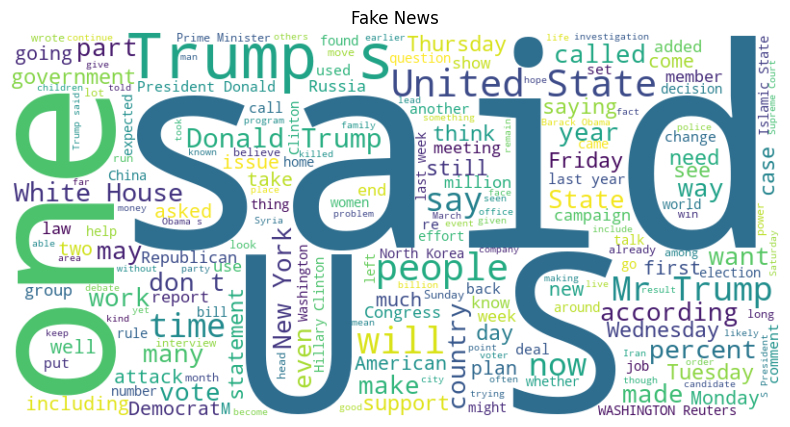

In [25]:
plot_wordcloud(fake_text, 'Fake News')

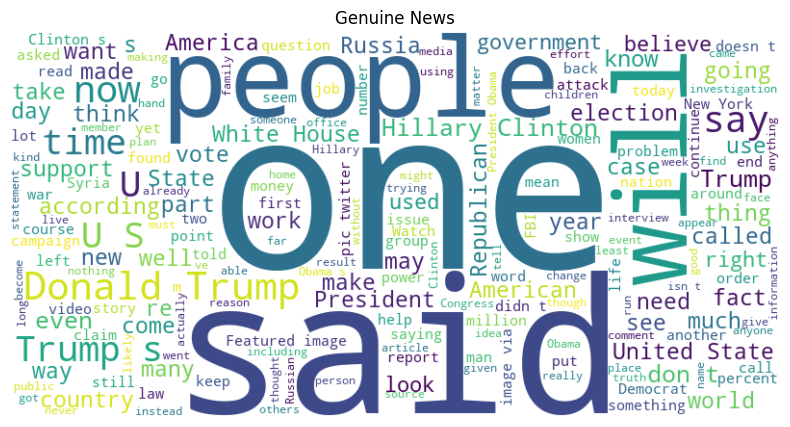

In [26]:
plot_wordcloud(real_text, 'Genuine News')

## Removing Punctuation and Stopword(words that carry very little meaning)

In [27]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
stopwords.fileids()

['albanian',
 'arabic',
 'azerbaijani',
 'basque',
 'belarusian',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'tamil',
 'turkish']

In [29]:
text_column = 'text'
label_column = 'label'

english_stopwords = set(stopwords.words('english'))
english_punctuation = string.punctuation

def preprocess_text(text):
    
    #remove punctuation
    remove_punc = [char for char in text if char not in english_punctuation]
    clean_text = ''.join(remove_punc)

    #remove stopwords
    words = clean_text.split()
    text = ' '.join([word for word in words if word.lower() not in english_stopwords])
    
    return text

In [30]:
df[text_column] = df[text_column].apply(preprocess_text)

In [31]:
df[text_column].head()

0    comment expected Barack Obama Members FYF911 F...
1                           post votes Hillary already
2    demonstrators gathered last night exercising c...
3    dozen politically active pastors came private ...
4    RS28 Sarmat missile dubbed Satan 2 replace SS1...
Name: text, dtype: object

## Lemmatization for Text Normalization

In [44]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper to map Penn Treebank tags to wordnet POS tags
def penn_to_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Robust lemmatization function with sensible fallbacks
def lemmatize_text(text):
    try:
        if not isinstance(text, str):
            text = str(text)

        # Tokenize using nltk if available, otherwise fallback to simple split
        try:
            tokens = word_tokenize(text)
        except LookupError:
            tokens = text.split()

        # Try POS tagging; if tagger resource is missing, fall back to no-POS lemmatization
        try:
            tagged = pos_tag(tokens)
            lemmas = []
            for word, tag in tagged:
                wn_pos = penn_to_wordnet_pos(tag)
                lemmas.append(lemmatizer.lemmatize(word, pos=wn_pos))
            return ' '.join(lemmas)
        except LookupError:
            # averaged_perceptron_tagger (or language-specific variant) missing; do noun-only lemmatization
            return ' '.join([lemmatizer.lemmatize(w) for w in tokens])

    except Exception:
        # In case anything goes wrong, return the original (stringified) text
        return str(text)

In [45]:
# Apply preprocessing + lemmatization safely
# Ensure text/label column names exist
if 'text_column' not in globals():
    text_column = 'text'
if 'label_column' not in globals():
    label_column = 'label'

# Ensure column is string type then apply lemmatization (this is memory-heavy for very large datasets)
df[text_column] = df[text_column].astype(str).apply(lemmatize_text)

# Quick preview
df[text_column].head()

# Prepare features/labels for modeling
X_raw = df[text_column]
y = df[label_column]
labels = y

In [36]:
X_raw = df[text_column]
y = df[label_column]             
labels = y

## Splitting to avoid data leakage


In [51]:
xtrain_raw, xtest_raw, ytrain, ytest = train_test_split(
    X_raw,
    labels,
    test_size=0.2,
    random_state=200,
    stratify=labels
)

In [52]:
xtrain_raw.shape

(57707,)

In [48]:
xtest_raw.shape

(21641,)

In [49]:
ytrain.shape

(50493,)

In [50]:
ytest.shape

(21641,)

## Text -> Vectorizer

In [53]:
vectorizer = TfidfVectorizer()   

xtrain = vectorizer.fit_transform(xtrain_raw)   #fit ONLY on train
xtest = vectorizer.transform(xtest_raw) #only transform for test to avoid data leakage

In [54]:
x = xtrain

In [55]:
xtrain.shape

(57707, 321749)

In [56]:
xtest.shape

(14427, 321749)

## Evaluation Functions


In [57]:
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }
def plot_confusion(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Predicted 0', 'Predicted 1'],
        yticklabels=['Actual 0', 'Actual 1']
    )
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

## ----- Multinomial Naive Bayes ----

MultinomialNB: {'Accuracy': 0.8773826852429473, 'Confusion Matrix': array([[6429,  577],
       [1192, 6229]])}


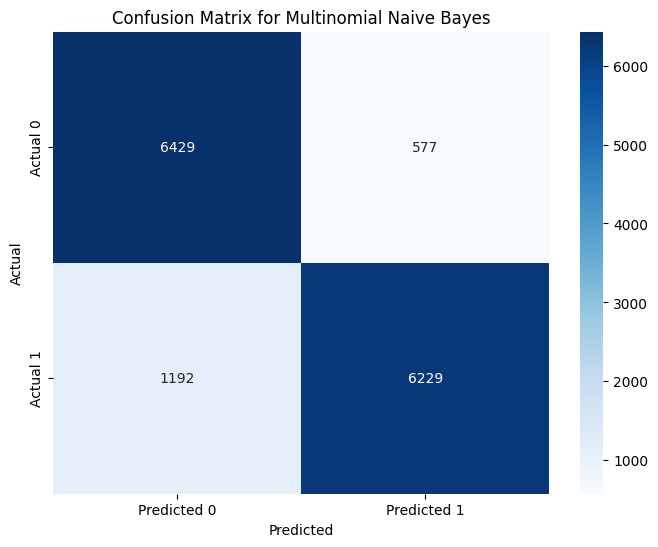

In [59]:
mnb_model = MultinomialNB()
mnb_model.fit(xtrain, ytrain)

mnb_results = evaluate_model(mnb_model, xtest, ytest)
print("MultinomialNB:", mnb_results)

cm_mnb = mnb_results['Confusion Matrix']
plot_confusion(cm_mnb, 'Confusion Matrix for Multinomial Naive Bayes')

## Classification Report

In [61]:
print("Classification Report - Multinomial Naive Bayes")
print(classification_report(ytest, mnb_model.predict(xtest), digits=3))

Classification Report - Multinomial Naive Bayes
              precision    recall  f1-score   support

           0      0.844     0.918     0.879      7006
           1      0.915     0.839     0.876      7421

    accuracy                          0.877     14427
   macro avg      0.879     0.879     0.877     14427
weighted avg      0.880     0.877     0.877     14427



## AUC and ROC Curve

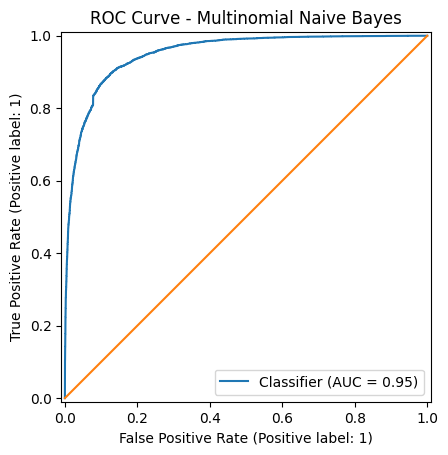

In [62]:

mnb_proba = mnb_model.predict_proba(xtest)[:, 1]
RocCurveDisplay.from_predictions(ytest, mnb_proba)
plt.plot([0,1],[0,1]) #center line er jonno
plt.title("ROC Curve - Multinomial Naive Bayes")
plt.show()


## ------------ Bernoulli Naive Bayes ------------

BernoulliNB: {'Accuracy': 0.8547168503500381, 'Confusion Matrix': array([[5650, 1356],
       [ 740, 6681]])}


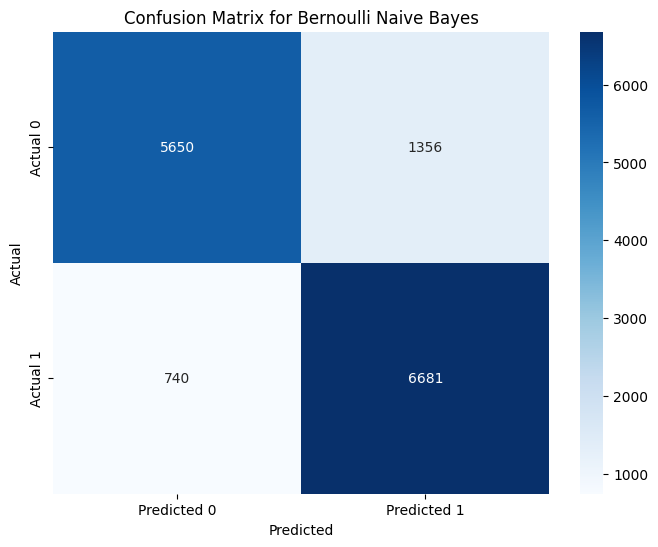

In [64]:
bnb_model = BernoulliNB()
bnb_model.fit(xtrain, ytrain)

bnb_results = evaluate_model(bnb_model, xtest, ytest)
print("BernoulliNB:", bnb_results)

cm_bnb = bnb_results['Confusion Matrix']
plot_confusion(cm_bnb, 'Confusion Matrix for Bernoulli Naive Bayes')

In [65]:
print("Classification Report - Bernoulli Naive Bayes")
print(classification_report(ytest, bnb_model.predict(xtest), digits=3))

Classification Report - Bernoulli Naive Bayes
              precision    recall  f1-score   support

           0      0.884     0.806     0.844      7006
           1      0.831     0.900     0.864      7421

    accuracy                          0.855     14427
   macro avg      0.858     0.853     0.854     14427
weighted avg      0.857     0.855     0.854     14427



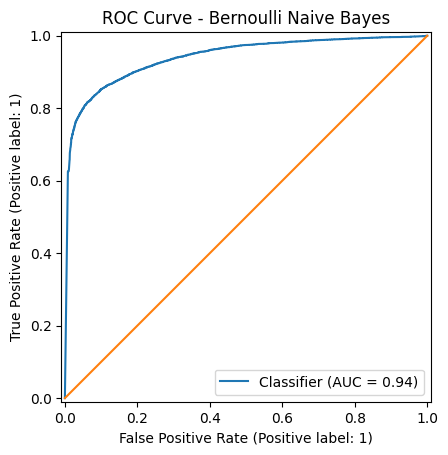

In [66]:
bnb_proba = bnb_model.predict_proba(xtest)[:, 1]
RocCurveDisplay.from_predictions(ytest, bnb_proba)
plt.plot([0,1],[0,1]) 
plt.title("ROC Curve - Bernoulli Naive Bayes")
plt.show()

## Logistic Regression

Logistic Regression: {'Accuracy': 0.9543910722950024, 'Confusion Matrix': array([[6613,  393],
       [ 265, 7156]])}


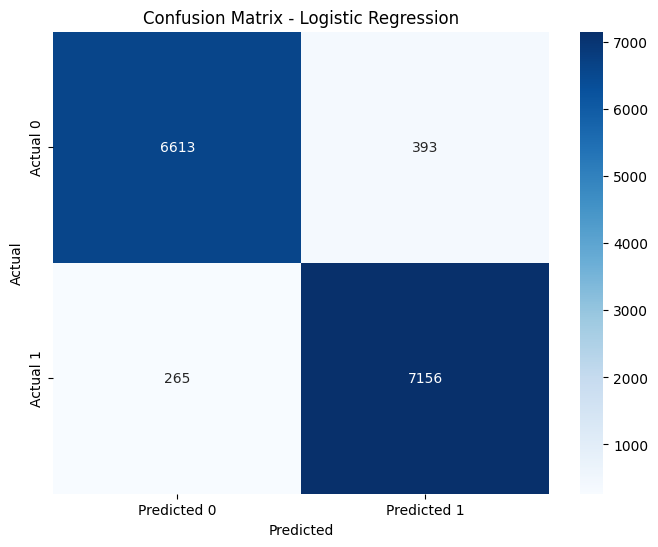

In [67]:
lr_model = LogisticRegression(max_iter=10000, penalty='l2')
lr_model.fit(xtrain, ytrain)

lr_results = evaluate_model(lr_model, xtest, ytest)
print("Logistic Regression:", lr_results)

cm_lr = lr_results['Confusion Matrix']
plot_confusion(cm_lr, 'Confusion Matrix - Logistic Regression')

In [68]:
print("Classification Report - Logistic Regression")
print(classification_report(ytest, lr_model.predict(xtest), digits=3))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0      0.961     0.944     0.953      7006
           1      0.948     0.964     0.956      7421

    accuracy                          0.954     14427
   macro avg      0.955     0.954     0.954     14427
weighted avg      0.955     0.954     0.954     14427



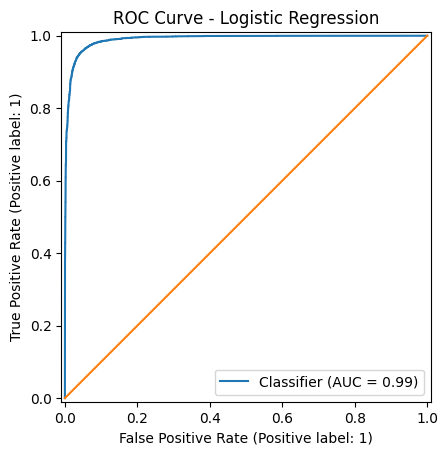

In [69]:
lr_proba = lr_model.predict_proba(xtest)[:, 1]
RocCurveDisplay.from_predictions(ytest, lr_proba)
plt.plot([0,1],[0,1]) 
plt.title("ROC Curve - Logistic Regression")
plt.show()

## Evaluation 

In [70]:
def plot_histogram(metric_values, model_names, metric_name):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval,
                round(yval, 3),
                ha='center', 
                va='bottom', 
                color='black')
    plt.show()

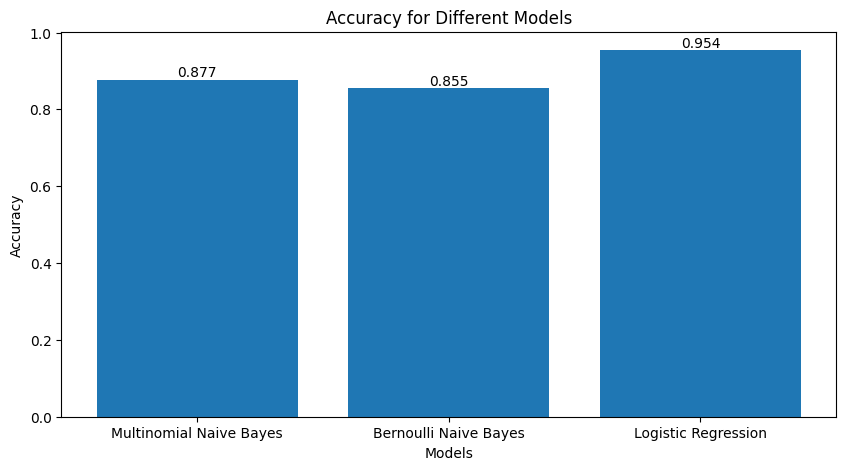

In [71]:

accuracy_values = [
    mnb_results['Accuracy'],
    bnb_results['Accuracy'],
    lr_results['Accuracy']
]
model_names = ['Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Logistic Regression']

plot_histogram(accuracy_values, model_names, 'Accuracy')

## Inference: Input random text and make a prediction

In [72]:
models = [mnb_model, bnb_model, lr_model]  #objects for ml models

def predict_for_text(random_text):
    
    #same preprocessing pipeline
    preprocessed_text = preprocess_text(random_text)
    lemmatized_text = lemmatize_text(preprocessed_text)
    text_vector = vectorizer.transform([lemmatized_text])

    #print("Preprocessed text:", preprocessed_text)
    #print("Lemmatized text:", lemmatized_text)
    print("Vector shape:", text_vector.shape)

    for model in models:
        prediction = model.predict(text_vector)
        
        print(f"\nModel Name: {type(model).__name__}")
        print("Prediction:", prediction[0])

In [75]:
text = """
A sperm donor who unknowingly harboured a genetic mutation that dramatically raises the risk of cancer has fathered at least 197 children across Europe, a major investigation has revealed.

Some children have already died and only a minority who inherit the mutation will escape cancer in their lifetimes.

The sperm was not sold to UK clinics, but the BBC can confirm a "very small" number of British families, who have been informed, used the donor's sperm while having fertility treatment in Denmark.

Denmark's European Sperm Bank, which sold the sperm, said families affected had their "deepest sympathy" and admitted the sperm was used to make too many babies in some countries.The investigation has been conducted by 14 public service broadcasters, including the BBC, as part of the European Broadcasting Union's Investigative Journalism Network.

The sperm came from an anonymous man who was paid to donate as a student, starting in 2005. His sperm was then used by women for around 17 years.

He is healthy and passed the donor screening checks. However, the DNA in some of his cells mutated before he was born.

It damaged the TP53 gene – which has the crucial role of preventing the body's cells turning cancerous.

Most of the donor's body does not contain the dangerous form of TP53, but up to 20% of his sperm do.

However, any children made from affected sperm will have the mutation in every cell of their body.
"""


In [76]:
text

'\nA sperm donor who unknowingly harboured a genetic mutation that dramatically raises the risk of cancer has fathered at least 197 children across Europe, a major investigation has revealed.\n\nSome children have already died and only a minority who inherit the mutation will escape cancer in their lifetimes.\n\nThe sperm was not sold to UK clinics, but the BBC can confirm a "very small" number of British families, who have been informed, used the donor\'s sperm while having fertility treatment in Denmark.\n\nDenmark\'s European Sperm Bank, which sold the sperm, said families affected had their "deepest sympathy" and admitted the sperm was used to make too many babies in some countries.The investigation has been conducted by 14 public service broadcasters, including the BBC, as part of the European Broadcasting Union\'s Investigative Journalism Network.\n\nThe sperm came from an anonymous man who was paid to donate as a student, starting in 2005. His sperm was then used by women for ar

In [77]:
predict_for_text(text)

Vector shape: (1, 321749)

Model Name: MultinomialNB
Prediction: 1

Model Name: BernoulliNB
Prediction: 1

Model Name: LogisticRegression
Prediction: 1


## Save

In [78]:
import pickle

model_file_path = "logistic_regression_tfidf.pkl"   

with open(model_file_path, "wb") as model_file:
    pickle.dump(
        {
            "model": lr_model,       #trained LogisticRegression
            "vectorizer": vectorizer #fitted TfidfVectorizer
        },
        model_file
    )

print(f"Saved Logistic Regression model and vectorizer to: {model_file_path}")

Saved Logistic Regression model and vectorizer to: logistic_regression_tfidf.pkl


## Load

In [79]:

with open(model_file_path, "rb") as model_file:
    saved_objects = pickle.load(model_file)

loaded_LR = saved_objects["model"]
loaded_vectorizer = saved_objects["vectorizer"]

print(type(loaded_LR), "loaded successfully")
print(type(loaded_vectorizer), "loaded successfully")

<class 'sklearn.linear_model._logistic.LogisticRegression'> loaded successfully
<class 'sklearn.feature_extraction.text.TfidfVectorizer'> loaded successfully


## Input → preprocessing → TF-IDF → model → prediction.

In [80]:
def predict_for_text(random_text):
    
    # same preprocessing pipeline as training
    preprocessed_text = preprocess_text(random_text)
    lemmatized_text = lemmatize_text(preprocessed_text)
    text_vector = loaded_vectorizer.transform([lemmatized_text])

    #print("Vector shape:", text_vector.shape)

    prediction = loaded_LR.predict(text_vector)[0]

    prediction_proba = None
    if hasattr(loaded_LR, "predict_proba"): #hasattr(obj, "predict_proba")
        prediction_proba = loaded_LR.predict_proba(text_vector)[0, 1]  #value of 1st row, 2nd col -> [probability_of_class_0, probability_of_class_1]

    print("\nModel Name: LogisticRegression")
    print("Prediction:", prediction)
    
    if prediction_proba is not None:
        print("Probability of class 1:", round(prediction_proba, 4))

    return prediction, prediction_proba

In [81]:
predict_for_text(text)


Model Name: LogisticRegression
Prediction: 1
Probability of class 1: 0.8973


(np.int64(1), np.float64(0.8973404271812097))